In [1]:
import pandas as pd
import cv2
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Đọc file CSV thành DataFrame
df = pd.read_csv("top50_daily.csv")
df.head()


,STT,TEXT,COUNT,VIDEO
0,1,thương yêu,6,"W03373B.mp4, W03373N.mp4, W03373T.mp4, W03450B..."
1,2,đặc biệt,4,"W01122B.mp4, W01122T.mp4, W01122N.mp4, W01122.mp4"
2,3,thành lập,4,"W03175N.mp4, W03175T.mp4, W03175B.mp4, W03175.mp4"
3,4,thường xuyên,4,"D0156N.mp4, D0156B.mp4, D0156.mp4, D0156T.mp4"
4,5,tưởng tượng,4,"W03732T.mp4, W03732.mp4, W03732N.mp4, W03732B.mp4"


In [2]:
df[["TEXT", "VIDEO"]]

,TEXT,VIDEO
0,thương yêu,"W03373B.mp4, W03373N.mp4, W03373T.mp4, W03450B..."
1,đặc biệt,"W01122B.mp4, W01122T.mp4, W01122N.mp4, W01122.mp4"
2,thành lập,"W03175N.mp4, W03175T.mp4, W03175B.mp4, W03175.mp4"
3,thường xuyên,"D0156N.mp4, D0156B.mp4, D0156.mp4, D0156T.mp4"
4,tưởng tượng,"W03732T.mp4, W03732.mp4, W03732N.mp4, W03732B.mp4"
5,bộ đội,"W00328N.mp4, W00328T.mp4, W00328B.mp4"
6,bình thường,"W00286N.mp4, W00286B.mp4, W00286T.mp4"
7,sữa bột,"W03037T.mp4, W03037B.mp4, W03037N.mp4"
8,sữa dê,"W03038N.mp4, W03038T.mp4, W03038B.mp4"
9,sữa bò,"W03036T.mp4, W03036B.mp4, W03036N.mp4"


In [3]:
for i in df.index:
    files = [x.strip() for x in df.loc[i, "VIDEO"].split(",")]
    print(f"Processing row {i}: {files}")

Processing row 0: ['W03373B.mp4', 'W03373N.mp4', 'W03373T.mp4', 'W03450B.mp4', 'W03450T.mp4', 'W03450N.mp4']
Processing row 1: ['W01122B.mp4', 'W01122T.mp4', 'W01122N.mp4', 'W01122.mp4']
Processing row 2: ['W03175N.mp4', 'W03175T.mp4', 'W03175B.mp4', 'W03175.mp4']
Processing row 3: ['D0156N.mp4', 'D0156B.mp4', 'D0156.mp4', 'D0156T.mp4']
Processing row 4: ['W03732T.mp4', 'W03732.mp4', 'W03732N.mp4', 'W03732B.mp4']
Processing row 5: ['W00328N.mp4', 'W00328T.mp4', 'W00328B.mp4']
Processing row 6: ['W00286N.mp4', 'W00286B.mp4', 'W00286T.mp4']
Processing row 7: ['W03037T.mp4', 'W03037B.mp4', 'W03037N.mp4']
Processing row 8: ['W03038N.mp4', 'W03038T.mp4', 'W03038B.mp4']
Processing row 9: ['W03036T.mp4', 'W03036B.mp4', 'W03036N.mp4']
Processing row 10: ['W00304N.mp4', 'W00304B.mp4', 'W00304T.mp4']
Processing row 11: ['W03011B.mp4', 'W03011T.mp4', 'W03011N.mp4']
Processing row 12: ['W00326B.mp4', 'W00326T.mp4', 'W00326N.mp4']
Processing row 13: ['W00459T.mp4', 'W00459N.mp4', 'W00459B.mp4']
Pro

In [4]:
#shape of vid:
cap = cv2.VideoCapture("Dataset/Video/D0001B.mp4")
if not cap.isOpened():
    print("Error: Could not open video.")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"Video shape: {width}x{height}, FPS: {fps}")

Video shape: 1280x720, FPS: 29.97002997002997


In [5]:
def draw_keypoints(frame, keypoints):
    for point in keypoints:
        x, y = int(point[0] * frame.shape[1]), int(point[1] * frame.shape[0])
        cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)
    return frame

In [6]:
import cv2

def extract_frame(video_path: str, n: int, save_path: str | None = None):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise IOError(f"Không mở được {video_path}")

    # Nhảy tới khung thứ n (đếm từ 0)
    cap.set(cv2.CAP_PROP_POS_FRAMES, n)

    ret, frame = cap.read()
    cap.release()

    if not ret:
        raise ValueError(f"Khung {n} > tổng số khung của video")

    if save_path:
        cv2.imwrite(save_path, frame)   # lưu ra file ảnh
    return frame                       # hoặc trả về mảng numpy


In [7]:
import mediapipe as mp
from config import Config
from detector import MediaPipeProcessor

pose = MediaPipeProcessor(Config())
results = []
def extract_video_keypoint(video_path):
    keypoints = []
    cap = cv2.VideoCapture(video_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        _, result = pose.process_frame(image_rgb)
        frame_keypoints = pose.extract_keypoints(result)
        results.append(result)
        keypoints.append(frame_keypoints)
    cap.release()
    return keypoints, results

2025-06-13 22:16:13.966586: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-13 22:16:14.033378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749827774.067802   21868 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749827774.077385   21868 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-13 22:16:14.137300: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [8]:
kpts, res = extract_video_keypoint("Dataset/Video/D0001B.mp4")
print(res[0])

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [9]:
for i, label, file_name in zip(df.index, df["TEXT"], df["VIDEO"]):
    files = [x.strip() for x in file_name.split(",")]
    for file in files:
        print(f"Processing row {i}: {label} {file}")

Processing row 0: thương yêu W03373B.mp4
Processing row 0: thương yêu W03373N.mp4
Processing row 0: thương yêu W03373T.mp4
Processing row 0: thương yêu W03450B.mp4
Processing row 0: thương yêu W03450T.mp4
Processing row 0: thương yêu W03450N.mp4
Processing row 1: đặc biệt W01122B.mp4
Processing row 1: đặc biệt W01122T.mp4
Processing row 1: đặc biệt W01122N.mp4
Processing row 1: đặc biệt W01122.mp4
Processing row 2: thành lập W03175N.mp4
Processing row 2: thành lập W03175T.mp4
Processing row 2: thành lập W03175B.mp4
Processing row 2: thành lập W03175.mp4
Processing row 3: thường xuyên D0156N.mp4
Processing row 3: thường xuyên D0156B.mp4
Processing row 3: thường xuyên D0156.mp4
Processing row 3: thường xuyên D0156T.mp4
Processing row 4: tưởng tượng W03732T.mp4
Processing row 4: tưởng tượng W03732.mp4
Processing row 4: tưởng tượng W03732N.mp4
Processing row 4: tưởng tượng W03732B.mp4
Processing row 5: bộ đội W00328N.mp4
Processing row 5: bộ đội W00328T.mp4
Processing row 5: bộ đội W00328B

In [10]:
# import numpy as np

# for i, file_names in zip(df.index, df["VIDEO"]):
#     print(f"Processing row {i}: {file_names}")
#     files = [x.strip() for x in file_names.split(",")]
#     for file in files:
#         video_path = f"data/Video_60frames/{file}"
#         keypoints, _ = extract_video_keypoint(video_path)
#         file_name = file.split(".")[0]
#         np.save(f"data/Keypoints/{file_name}.npy", keypoints)
#         print(f"Saved keypoints for {file} to data/keypoints/{file_name}.npy", len(keypoints))
        

In [11]:
class LoadData(Dataset):
    def __init__(self, keypoints_dir, csv_file, num_frames=30):
        self.keypoints_dir = keypoints_dir
        self.num_frames = num_frames
        df = pd.read_csv(csv_file)
        # use 'TEXT' as label column and 'VIDEO' for filenames
        labels = sorted(df['TEXT'].unique())
        self.label2idx = {lab: idx for idx, lab in enumerate(labels)}
        # flatten VIDEO entries
        samples = []
        for _, row in df.iterrows():
            label = row['TEXT']
            for vid in str(row['VIDEO']).split(','):
                fname = vid.strip()
                base, _ = os.path.splitext(fname)
                samples.append((base, label))
        self.samples = samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        fname, label_str = self.samples[idx]
        path = os.path.join(self.keypoints_dir, f"{fname}.npy")
        data = np.load(path)  # (T, V*2)
        # pad or trim to num_frames
        if data.shape[0] < self.num_frames:
            pad = np.zeros((self.num_frames - data.shape[0], data.shape[1]))
            data = np.vstack([data, pad])
        else:
            data = data[:self.num_frames]
        # reshape to (C, T, V)
        T, V2 = data.shape
        V = V2 // 2
        data = data.reshape(T, V, 2).transpose(2, 0, 1)
        sample = torch.from_numpy(data).float()
        label = self.label2idx[label_str]
        return sample, label

In [12]:
dataset = LoadData('data/Keypoints', 'top50_daily.csv', num_frames= 60)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


In [13]:
class LSTMClassifier(nn.Module):
    """
    LSTM classifier over sequences of flat keypoint features.
    Input: (N, T, F) where F = number of features per frame (e.g., 126).
    """
    def __init__(self, feature_size, hidden_size, num_layers, num_classes, dropout=0.5):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=feature_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x: (N, T, F)
        out, _ = self.lstm(x)  # out: (N, T, H)
        # take last time step
        last = out[:, -1, :]   # (N, H)
        return self.fc(last)

In [14]:
feature_size = 126    # flat feature dimension per frame
hidden_size = 128
num_layers = 2
batch_size = 16
lr = 1e-3
epochs = 300
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMClassifier(
    feature_size=feature_size,
    hidden_size=hidden_size,
    num_layers=num_layers,
    num_classes=len(dataset.label2idx)
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [15]:
loss_history = []
for epoch in range(1, epochs+1):
    model.train()
    total_loss = 0.0
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        # reshape X: (batch, C, T, V) -> (batch, T, C*V)
        X_in = X.permute(0, 2, 1, 3).reshape(X.size(0), X.size(2), -1)
        preds = model(X_in)            # (batch, num_classes)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * X.size(0)
    # Compute average loss per sample (not per batch)
    avg_loss = total_loss / len(dataset)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch}/{epochs}, Loss: {avg_loss:.4f}")


Epoch 1/300, Loss: 3.9331
Epoch 2/300, Loss: 3.9017
Epoch 3/300, Loss: 3.8550
Epoch 4/300, Loss: 3.7490
Epoch 5/300, Loss: 3.5760
Epoch 6/300, Loss: 3.4080
Epoch 7/300, Loss: 3.2327
Epoch 8/300, Loss: 3.1009
Epoch 9/300, Loss: 2.9889
Epoch 10/300, Loss: 2.8330
Epoch 11/300, Loss: 2.7113
Epoch 12/300, Loss: 2.6052
Epoch 13/300, Loss: 2.4693
Epoch 14/300, Loss: 2.3611
Epoch 15/300, Loss: 2.2291
Epoch 16/300, Loss: 2.2519
Epoch 17/300, Loss: 2.0410
Epoch 18/300, Loss: 1.9409
Epoch 19/300, Loss: 1.8278
Epoch 20/300, Loss: 1.8442
Epoch 21/300, Loss: 1.7341
Epoch 22/300, Loss: 1.6383
Epoch 23/300, Loss: 1.5726
Epoch 24/300, Loss: 1.4227
Epoch 25/300, Loss: 1.3497
Epoch 26/300, Loss: 1.3384
Epoch 27/300, Loss: 1.3307
Epoch 28/300, Loss: 1.2117
Epoch 29/300, Loss: 1.1542
Epoch 30/300, Loss: 1.1005
Epoch 31/300, Loss: 1.1994
Epoch 32/300, Loss: 1.1406
Epoch 33/300, Loss: 1.0033
Epoch 34/300, Loss: 0.9180
Epoch 35/300, Loss: 0.8440
Epoch 36/300, Loss: 0.7956
Epoch 37/300, Loss: 0.7631
Epoch 38/3

Text(0, 0.5, 'Loss')

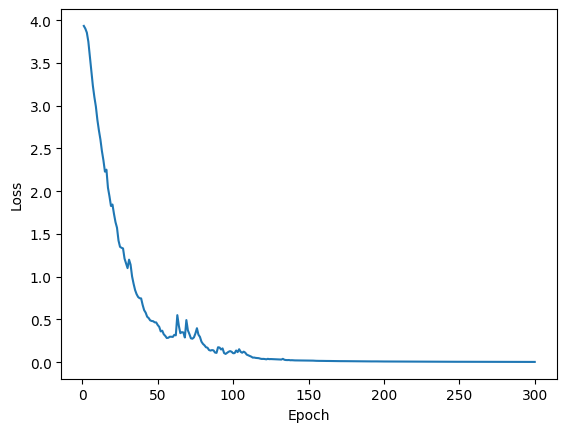

In [17]:
#visualize training progress
import matplotlib.pyplot as plt
plt.plot(range(1, epochs+1), loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')  

In [18]:
inference_video = "Dataset/Video/W03036T.mp4"
keypoints = extract_video_keypoint(inference_video)[0]
keypoints = np.array(keypoints)
keypoints = keypoints.reshape(keypoints.shape[0], -1)  # (T, V*2)
#Duyệt hết các khung hình, lấy 60 khung hình mỗi lần để cho vào model
if keypoints.shape[0] < 60:
    pad = np.zeros((60 - keypoints.shape[0], keypoints.shape[1]))
    keypoints = np.vstack([keypoints, pad])
else:
    for i in range(60, keypoints.shape[0]):
        keypoints_extract = keypoints[i-60:i, :]
        keypoints_extract = keypoints_extract.reshape(60, -1, 2).transpose(2, 0, 1)
        keypoints_tensor = torch.from_numpy(keypoints_extract).float().unsqueeze(0).to(device)
        # Reshape to (batch, T, C*V) as required by the model
        keypoints_input = keypoints_tensor.permute(0, 2, 1, 3).reshape(keypoints_tensor.size(0), keypoints_tensor.size(2), -1)
        with torch.no_grad():
            model.eval()
            preds = model(keypoints_input)
        pred_label = preds.argmax(dim=1).item()
        #print confidence score
        confidence = torch.softmax(preds, dim=1).max().item()
        # Create reverse mapping from index to label string
        idx2label = {v: k for k, v in dataset.label2idx.items()}
        pred_class = idx2label[pred_label]
        print(f"Predicted class for segment starting at frame {i}: {pred_class}  with confidence {confidence:.4f}")



Predicted class for segment starting at frame 60: buổi sáng  with confidence 0.6390
Predicted class for segment starting at frame 61: tấm vải  with confidence 0.5658
Predicted class for segment starting at frame 62: tấm vải  with confidence 0.5058
Predicted class for segment starting at frame 63: buổi sáng  with confidence 0.4226
Predicted class for segment starting at frame 64: buổi sáng  with confidence 0.6164
Predicted class for segment starting at frame 65: buổi sáng  with confidence 0.7995
Predicted class for segment starting at frame 66: buổi sáng  with confidence 0.9383
Predicted class for segment starting at frame 67: buổi sáng  with confidence 0.9712
Predicted class for segment starting at frame 68: buổi sáng  with confidence 0.9578
Predicted class for segment starting at frame 69: buổi sáng  with confidence 0.8606
Predicted class for segment starting at frame 70: buổi sáng  with confidence 0.5507
Predicted class for segment starting at frame 71: sữa bò  with confidence 0.8699